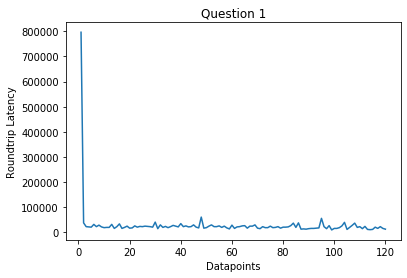

Mean is  29125.0  microseconds
Std Deviation is  71026.75108540372  microseconds


In [98]:
import datetime as dt
import time as t
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import statistics as st
 

def read_file(file_name):
    text = open(file_name).read()
    lines = text.split("\n")
    data = [line.split(" ") for line in lines]
    return data

def plot_graph(x,y):
    plt.plot(x, y)
    plt.xlabel('Datapoints')
    plt.ylabel('Roundtrip Latency')
    plt.title('Question 1')
    plt.show()

def grpc_q1_p1():
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_2.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_3.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC.txt")
    data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_2.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_3.txt")
    y = []
    
    for item in data:
        client_sent = dt.datetime.strptime(item[0], '%Y-%m-%d%H:%M:%S.%f')
        client_recd = dt.datetime.strptime(item[1], '%Y-%m-%d%H:%M:%S.%f')
        server_sent = dt.datetime.strptime(item[2], '%Y-%m-%d%H:%M:%S.%f')
        server_recd = dt.datetime.strptime(item[3], '%Y-%m-%d%H:%M:%S.%f')

        y.append((client_recd - client_sent).microseconds)

    x = [i for i in range(1, 121)]
    plot_graph(x, y)
    
    print("Mean is ", sum(y) / 120," microseconds")
    print("Std Deviation is ", st.stdev(y)," microseconds")
    
grpc_q1_p1()    

383620.8333333333
355625.0


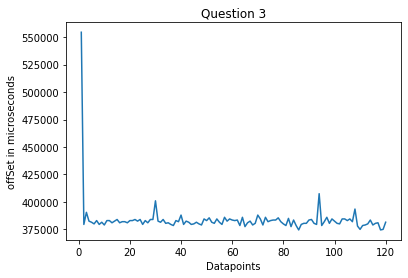

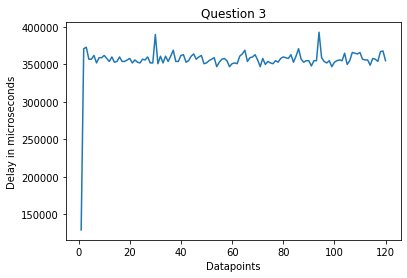

In [106]:
import datetime as dt
import time as t
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import statistics as st
 

def read_file(file_name):
    text = open(file_name).read()
    lines = text.split("\n")
    data = [line.split(" ") for line in lines]
    return data

def plot_graph(x,y,textDetails):
    plt.plot(x, y)
    plt.xlabel('Datapoints')
    plt.ylabel(textDetails)
    plt.title('Question 3')
    plt.show()

def grpc_q3_p1():
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_2.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_3.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_2.txt")
    data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_3.txt")
    offSet = []
    delay = []
    for item in data:
        client_sent = dt.datetime.strptime(item[0], '%Y-%m-%d%H:%M:%S.%f')
        client_recd = dt.datetime.strptime(item[1], '%Y-%m-%d%H:%M:%S.%f')
        server_sent = dt.datetime.strptime(item[2], '%Y-%m-%d%H:%M:%S.%f')
        server_recd = dt.datetime.strptime(item[3], '%Y-%m-%d%H:%M:%S.%f')
        
        tmp = (client_sent-server_sent).microseconds / 2 + (client_recd-server_recd).microseconds / 2
        
        offSet.append(tmp)
        
        delay.append((client_recd-client_sent).microseconds - (server_sent-server_recd).microseconds)
    
    print(sum(offSet)/120)
    print(sum(delay)/120)
    
    x = [i for i in range(1, 121)]
    plot_graph(x,offSet,'offSet in microseconds')
    plot_graph(x,delay,'Delay in microseconds')
    
    
grpc_q3_p1()    

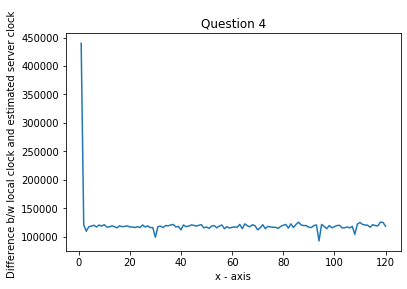

Abolute min Latency  64500.0  microseconds
Error Bound  132000.0  microseconds


In [93]:
import datetime as dt
import time as t
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import statistics as st
import numpy as np
 

def read_file(file_name):
    text = open(file_name).read()
    lines = text.split("\n")
    data = [line.split(" ") for line in lines]
    return data

def plot_graph(x,y):
    plt.plot(x, y)
    plt.xlabel('x - axis')
    plt.ylabel('Difference b/w local clock and estimated server clock ')
    plt.title('Question 4')
    plt.show()

def grpc_q4_p1():
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_2.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_3.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC.txt")
    #data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_2.txt")
    data = read_file(r"C:\Users\DELL\Desktop\dm\Dustributed Systems\output_RPC_3.txt")
    
    diff_1 = []
    abs_min_lat_list = []
    error_bound_part1=[]
   
    for item in data:
        client_sent = dt.datetime.strptime(item[0], '%Y-%m-%d%H:%M:%S.%f')
        client_recd = dt.datetime.strptime(item[1], '%Y-%m-%d%H:%M:%S.%f')
        server_sent = dt.datetime.strptime(item[2], '%Y-%m-%d%H:%M:%S.%f')
        server_recd = dt.datetime.strptime(item[3], '%Y-%m-%d%H:%M:%S.%f')
        
        t_est = (server_recd)  + (client_recd-client_sent) /2
        diff = (t_est - client_recd).microseconds
        
        diff_1.append(diff)
        error_bound_part1.append((client_recd-client_sent).microseconds/2)
        
        abs_min_lat_list.append(((client_recd-client_sent).microseconds/2 - (server_sent-server_recd).microseconds/2))
    
    
    
    x = [i for i in range(1, 121)]
    plot_graph(x,diff_1)
    
    #print(abs_min_lat_list.index(0.0))
    #print("Abolute min Latency ", abs_min_lat_list)
    print("Abolute min Latency ", min(abs_min_lat_list)," microseconds")
    
    error_bound=[x - np.min(abs_min_lat_list) for x in error_bound_part1]
    
    print("Error Bound ",max(error_bound)," microseconds")
    
grpc_q4_p1()    